In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import util
import image_features.hough as hough
import stereo_geometry.stereo as tf
import stereo_geometry.interpolation as interp

(540, 960, 3)


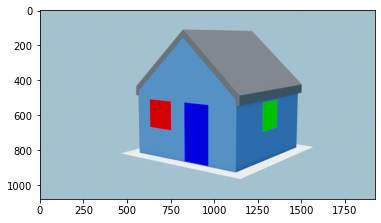

In [14]:
#Test rotation with interpolation regimes: bilinear, bicubic, sinc, lanczos
dims = image.shape
resized_img = cv2.resize(image, (2*dims[1],2*dims[0]), interpolation=cv2.INTER_CUBIC)
plt.imshow(resized_img)
print(dims)

### 0. Interpolation Regimes

In [13]:


#Bilinear


#Bicubic



#Sinc


#Lanczos


### 1. Color Spaces

Text(0.5, 0, 'Lightness Channel')

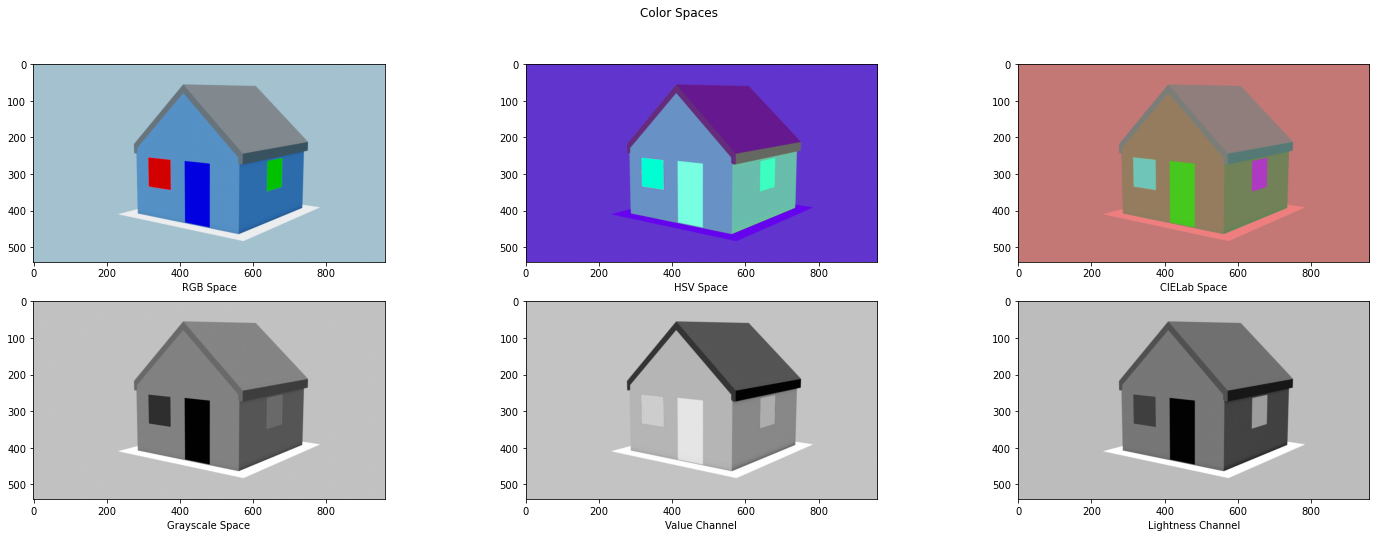

In [15]:
fig, ax = plt.subplots(2,3, figsize=(25,8))
fig.suptitle('Color Spaces')

#Load and diaplay image in RGB, HSV, and LAB
ax[0,0].imshow(image)
ax[0,0].set_xlabel('RGB Space')

#grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ax[1,0].imshow(gray, cmap='gray')
ax[1,0].set_xlabel('Grayscale Space')

#HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
ax[0,1].imshow(hsv)
ax[0,1].set_xlabel('HSV Space')

ax[1,1].imshow(hsv[:,:,2], cmap='gray')
ax[1,1].set_xlabel('Value Channel')

#Lab
lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
ax[0,2].imshow(lab)
ax[0,2].set_xlabel('CIELab Space')

ax[1,2].imshow(lab[:,:,0], cmap='gray')
ax[1,2].set_xlabel('Lightness Channel')

### 2. Low Pass Filtering

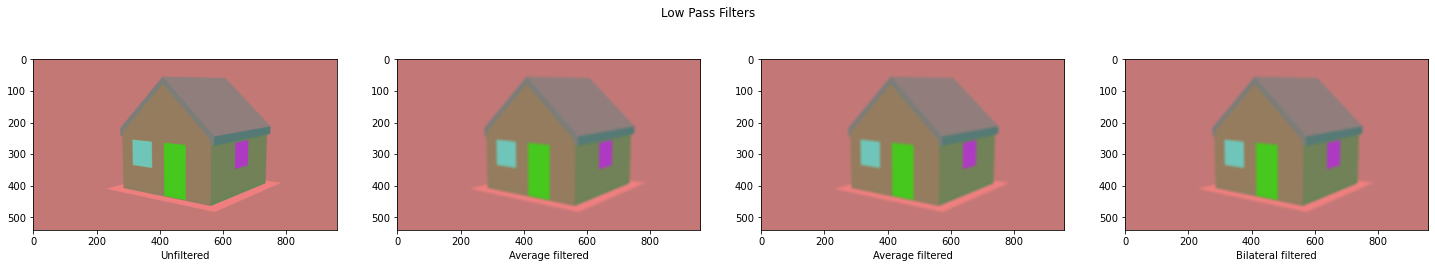

In [16]:
#Test low pass filters: Average, Gaussian, Bilateral
fig, ax = plt.subplots(1,4, figsize=(25,4))
fig.suptitle('Low Pass Filters')

#original
ax[0].set_xlabel('Unfiltered')
ax[0].imshow(lab)

#Average filter 5x5
n = 11
im_ave = cv2.blur(lab, (n,n))
ax[1].set_xlabel('Average filtered')
ax[1].imshow(im_ave)

#Gaussian Filter 5x5
im_gauss = cv2.GaussianBlur(lab, (n, n), 0)
ax[2].set_xlabel('Average filtered')
ax[2].imshow(im_ave)

#Bilateral filter 5x5
im_bil = cv2.bilateralFilter(lab, 9, n*10, n*10)
ax[3].set_xlabel('Bilateral filtered')
ax[3].imshow(im_ave)

### 3. Canny Edge Detection

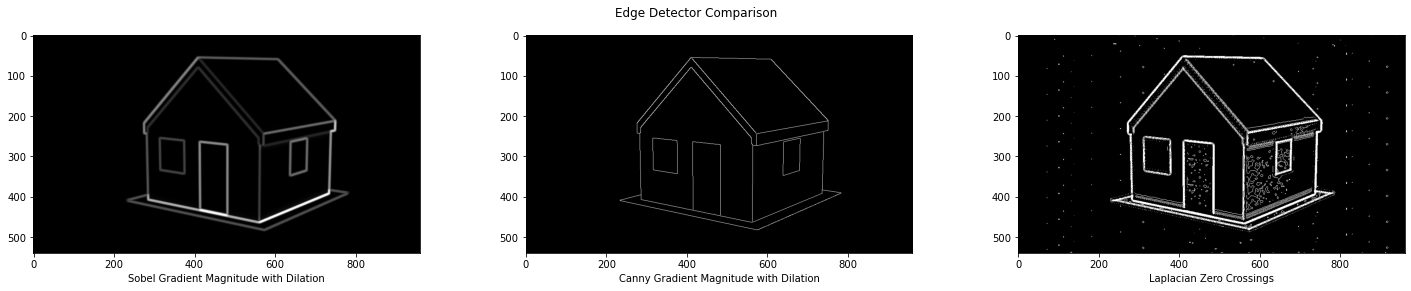

In [17]:
#Edge filter to detect edges for: columns - [Sobel, LoG, Canny] rows - [channel, color]
fig, ax = plt.subplots(1,3, figsize=(25,4))
fig.suptitle('Edge Detector Comparison')

lightness = lab[:,:,0]

#Sobel
sobelx = cv2.Sobel(lightness, cv2.CV_64F, 1, 0, ksize=11)
sobely = cv2.Sobel(lightness, cv2.CV_64F, 0, 1, ksize=11)
magnitude = np.sqrt(sobelx**2 + sobely**2)
direction = np.arctan2(sobely, sobelx) * 180 / np.pi
magnitude = cv2.dilate(magnitude,None)
ax[0].set_xlabel('Sobel Gradient Magnitude with Dilation')
ax[0].imshow(magnitude, cmap='gray')

#Canny
canny = cv2.Canny(lightness, 50, 100)
#canny = cv2.dilate(canny,None)
ax[1].set_xlabel('Canny Gradient Magnitude with Dilation')
ax[1].imshow(canny, cmap='gray')

#Laplacian
n = 11
im_gauss = cv2.GaussianBlur(lab, (n, n), 0)
laplacian = cv2.Laplacian(im_gauss[:,:,0], cv2.CV_64F)
threshold, lap_otsu = cv2.threshold(laplacian.astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ax[2].set_xlabel('Laplacian Zero Crossings')
ax[2].imshow(lap_otsu, cmap='gray')

### 4. Find Lines and Intersections using Hough Transform

Part #1: Find Hough Lines and Intersection Points

(9, 2)
(33, 2)
(12, 2, 2)


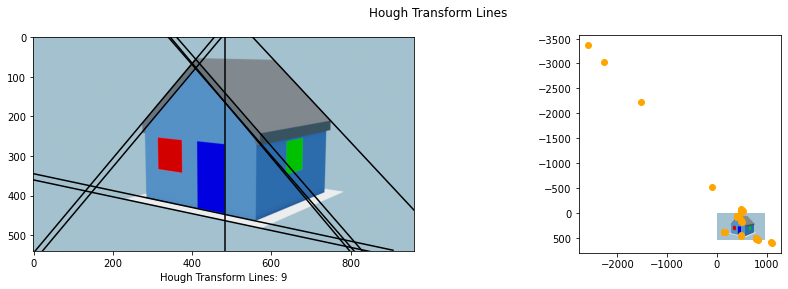

In [18]:
fig, ax = plt.subplots(1,2, figsize=(15, 4))
fig.suptitle('Hough Transform Lines')

#compute hough lines
houghlines = cv2.HoughLines(canny, 1, np.pi / 180, 140, None, 0, 0)
dims = houghlines.shape
houghlines = np.reshape(houghlines, (dims[0],dims[2]))

#plot hough lines
ax[0].set_xlabel(f'Hough Transform Lines: {dims[0]}')
ax[0].imshow(image)
print(houghlines.shape)
util.plotLines(ax[0], houghlines)

#find all intersections
intersections, parallels = util.computeRadialIntersections(houghlines)
print(intersections.shape)
print(parallels.shape)
ax[1].imshow(image)
#util.plotLines(ax[1], houghlines)
dims = canny.shape
ax[1].scatter(intersections[:,0], intersections[:,1], color='orange')

#find kmeans of intersections


In [19]:
#KMeans cluster intensity and use masks with hough for parallel lines


Part #2: Display all lines and intersection points within the image

In [20]:
def plotImandPoints(ax, image, points):
    pass

In [21]:
1#from manual
lines = np.array([
    [[315,256], [375, 263]],
    [[314,333], [376, 344]],
    [[410,56], [608,59]],
    [[572,245], [750,212]],
    [[638,264], [679, 255]],
    [[638,346], [678, 336]]
])

In [22]:
#Compute intersection points (n^2)


#Seperate into points inside the image and outside the image


#Plot the inside points (pink)
ax[1].set_xlabel('Internal Intersection Points')
ax[1].imshow(image)


#Transform image to include points at infinity and 
ax[2].set_xlabel('Intersection Points at Infinity')
ax[2].imshow(image)


#Plot the outside points (orange)


IndexError: index 2 is out of bounds for axis 0 with size 2

### 5. Line at $\infty$

In [ ]:
#display all intersection points outside the image and the line at infinity


array([1, 2])

### 6. Homography up to Affine Transform

Part #2: Compute Homography

In [30]:
x = np.array([[1,2,3,1], [1,2,3,1]])
w = np.array(util.skew(np.array([2,4,1]))[:1])
k = np.kron(x, w)
k.shape

(2, 12)

### 7. Metric Homography up to Similarity Transform

Part #1: Compute Homography

Part #2: Compute Area of the Door